# **Importing Libraries and Loading Data**

In [ ]:
import io
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno
from scipy import stats

import plotly.graph_objects as go
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from plotly.subplots import make_subplots


# For ML models
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

pathname = "/content/drive/My Drive/Heart Project/"
os.chdir(pathname)

Mounted at /content/drive


In [ ]:
filename = "heartdatacleaned.csv"
df = pd.read_csv(filename)

# **Cleaning and Checking our Data**


Checking the dimensions (number of rows and columns) of the DataFrame.
(Here we have 319,795 rows and 18 columns)


In [ ]:
df.shape

(319795, 18)

Here we see the information of our Data Frame. Specifically the Non-Null Count and Dtype. Since we have 319795 in count, that means we dont have any missing values. For the Dtype we can see that we have both float64 and object, float being numerical columns and object for being categorical


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

AgeCategory shouldnt be categorical, so we apply a function to calculate the mean age and make it a continous feature


In [ ]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df['AgeCategory'] = df['AgeCategory'].astype('float')

With that, now:

Categorical Features:
HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease, SkinCancer

Continuous Features:
BMI, PhysicalHealtH, MentalHealth, AgeCategory, SleepTime

Now, we will see the Column Statistica for our continous features

In [ ]:
df.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
AgeCategory,54.355759,17.720429,21.000000,42.000000,57.000000,67.000000,80.000000
SleepTime,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


Mean: BMI is approximately 28.33, the mean PhysicalHealth score is approximately 3.37, the mean MentalHealth score is approximately 3.90, and the mean SleepTime is approximately 7.10.

We now check for missing data, the output below that there are no missing values (null values) in any of the columns because all the counts are zeros.

In [ ]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Here we check for duplicated in our data, this indicates that there are 18,078 duplicate rows in your DataFrame

In [ ]:
df.duplicated().sum()

18078

We use this to remove the duplicates


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df_2 = df.copy()
cols_to_bin = df_2.drop(["AgeCategory","GenHealth","BMI","PhysicalHealth","MentalHealth","SleepTime"],axis=1).columns
for i in cols_to_bin:
  n = pd.get_dummies(df_2[i],drop_first=True)
  df_2.drop(i,axis=1,inplace=True)
  if(list(n.columns)[0]=="Yes"):
    n.rename(columns={"Yes":i} ,inplace=True)
  df_2 = pd.concat([df_2,n],axis=1)

In [ ]:
df_2.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,GenHealth,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,...,Hispanic,Other,White,"No, borderline diabetes",Yes,Yes (during pregnancy),PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,16.60,3.0,30.0,57.0,Very good,5.0,0,1,0,0,...,0,0,1,0,1,0,1,1,0,1
1,20.34,0.0,0.0,80.0,Very good,7.0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,67.0,Fair,8.0,0,1,0,0,...,0,0,1,0,1,0,1,1,0,0
3,24.21,0.0,0.0,77.0,Good,6.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,23.71,28.0,0.0,42.0,Very good,8.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ["AgeCategory","GenHealth","PhysicalHealth","MentalHealth","SleepTime"]
for i in cols :
  df_2[i] = df[[i]].apply(le.fit_transform)

In [ ]:
df_2.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,GenHealth,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,...,Hispanic,Other,White,"No, borderline diabetes",Yes,Yes (during pregnancy),PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,16.60,3,30,7,4,4,0,1,0,0,...,0,0,1,0,1,0,1,1,0,1
1,20.34,0,0,12,4,6,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20,30,9,1,7,0,1,0,0,...,0,0,1,0,1,0,1,1,0,0
3,24.21,0,0,11,2,5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,23.71,28,0,4,4,7,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


# **EDA**

In [ ]:
fig = px.sunburst(df, path=['Sex','HeartDisease']).update_traces(textinfo='label+percent parent')
fig.show()

In [ ]:
fig = make_subplots(
    rows=7, cols=2, subplot_titles=("HeartDisease", "Smoking",
                                    "AlcoholDrinking","Stroke",
                                    "DiffWalking", "Sex",
                                    'Race', 'Diabetic',
                                    'PhysicalActivity','GenHealth',
                                    'Asthma', 'KidneyDisease',
                                    'SkinCancer'),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(df['HeartDisease'].value_counts().index),
                     values=[x for x in df['HeartDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Smoking'].value_counts().index),
                     values=[x for x in df['Smoking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(df['AlcoholDrinking'].value_counts().index),
                     values=[x for x in df['AlcoholDrinking'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Stroke'].value_counts().index),
                     values=[x for x in df['Stroke'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(df['DiffWalking'].value_counts().index),
                     values=[x for x in df['DiffWalking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Sex'].value_counts().index),
                     values=[x for x in df['Sex'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Race'].value_counts().index),
                     values=[x for x in df['Race'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(df['PhysicalActivity'].value_counts().index),
                     values=[x for x in df['PhysicalActivity'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=4, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Diabetic'].value_counts().index),
                     values=[x for x in df['Diabetic'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=5, col=1)

fig.add_trace(go.Pie(labels=np.array(df['GenHealth'].value_counts().index),
                     values=[x for x in df['GenHealth'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=5, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Asthma'].value_counts().index),
                     values=[x for x in df['Asthma'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=1)

fig.add_trace(go.Pie(labels=np.array(df['KidneyDisease'].value_counts().index),
                     values=[x for x in df['KidneyDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=2)

fig.add_trace(go.Pie(labels=np.array(df['SkinCancer'].value_counts().index),
                     values=[x for x in df['SkinCancer'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=7, col=1)


fig.update_layout(height=3200, font=dict(size=14), showlegend=False)

fig.show()

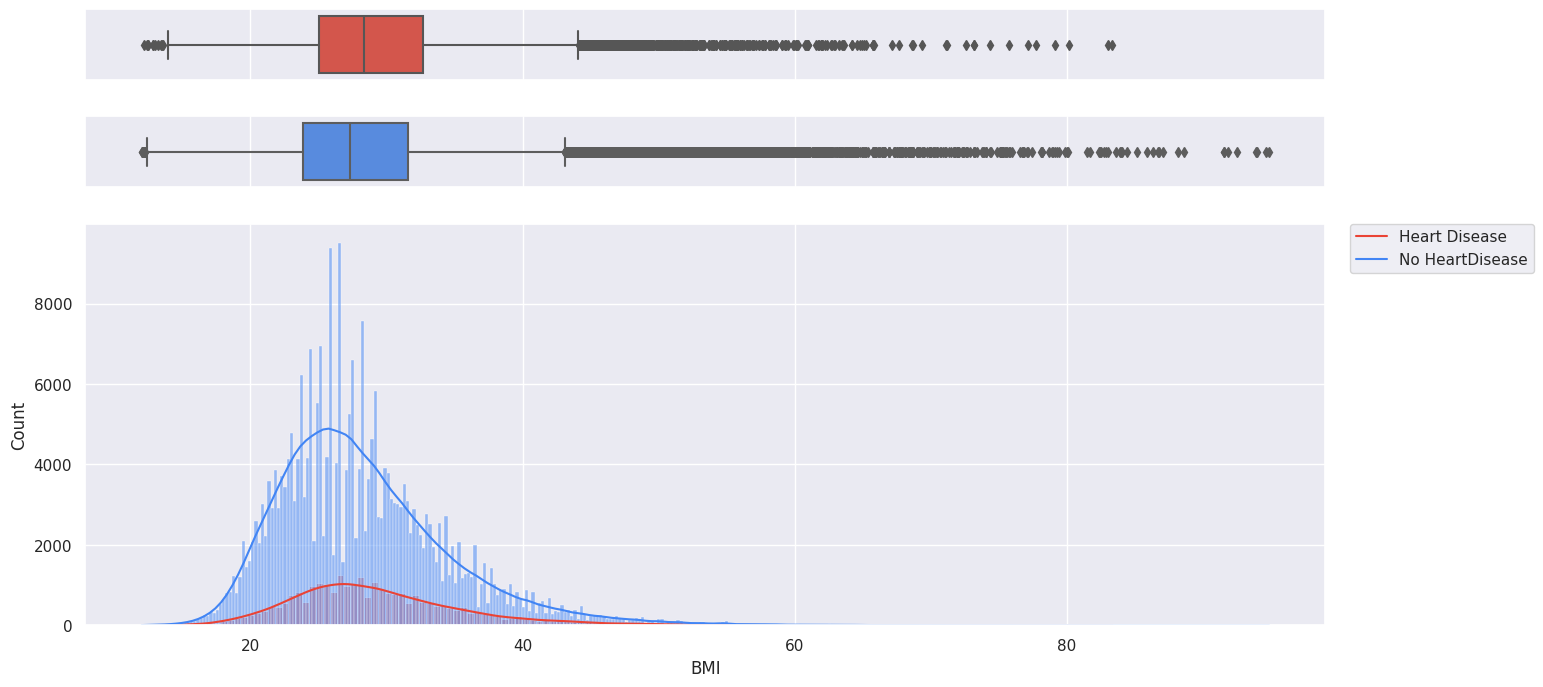

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})

# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df[df['HeartDisease']=='Yes']["BMI"], ax=ax_box1, color="#ea4335")
sns.histplot(df[df['HeartDisease']=='Yes'], x="BMI", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df[df['HeartDisease']=='No']["BMI"], ax=ax_box2, color='#4285f4')
sns.histplot(df[df['HeartDisease']=='No'], x="BMI", ax=ax_hist, kde=True, color='#4285f4')

# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

People with Heart Disease are found to have a higher BMI than people with no Heart Disease

Now, we will look at the Age and diseases

<ipython-input-14-4f9707e4ff1a>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-14-4f9707e4ff1a>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-14-4f9707e4ff1a>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.




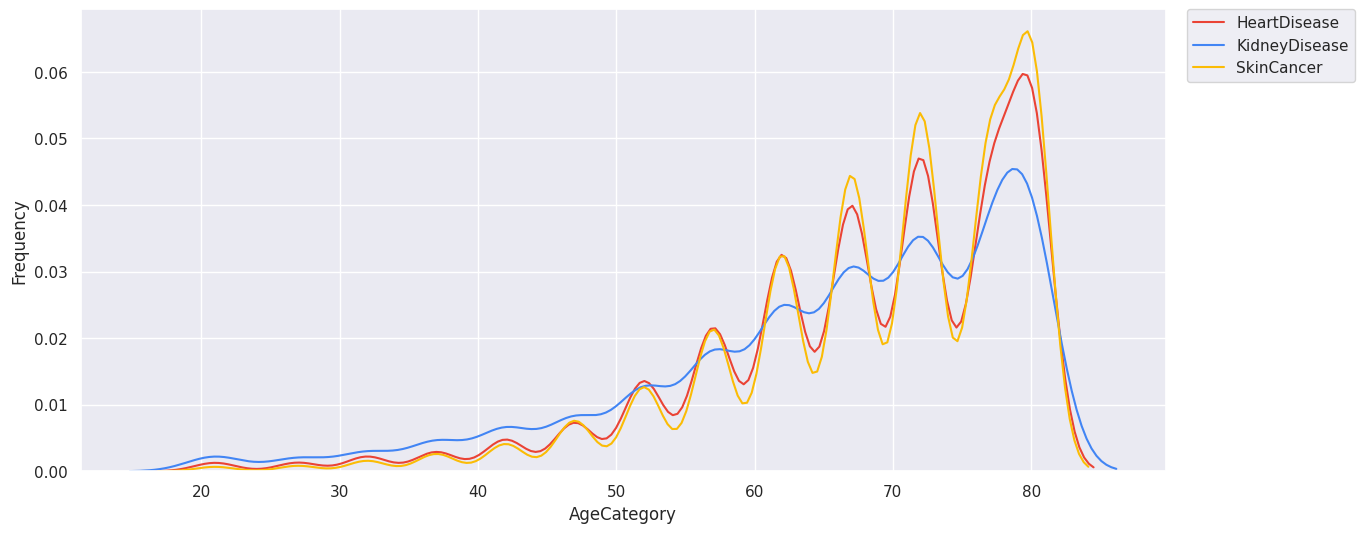

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(df[df["HeartDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#ea4335", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["KidneyDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#4285f4", label="KidneyDisease", ax = ax)
sns.kdeplot(df[df["SkinCancer"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#fbbc05", label="SkinCancer", ax = ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

People found to have heart disease, skin cancer & kidney disease are mostly old people

<ipython-input-15-e6630a03ae4e>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-15-e6630a03ae4e>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




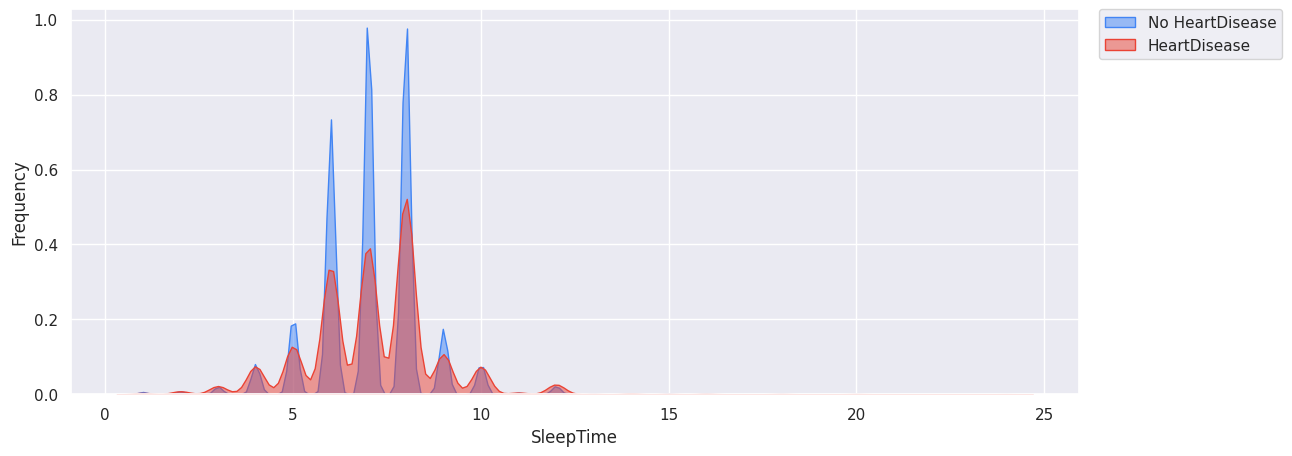

In [ ]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]=='No']["SleepTime"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["SleepTime"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

<ipython-input-16-6089ef6de67b>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-16-6089ef6de67b>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




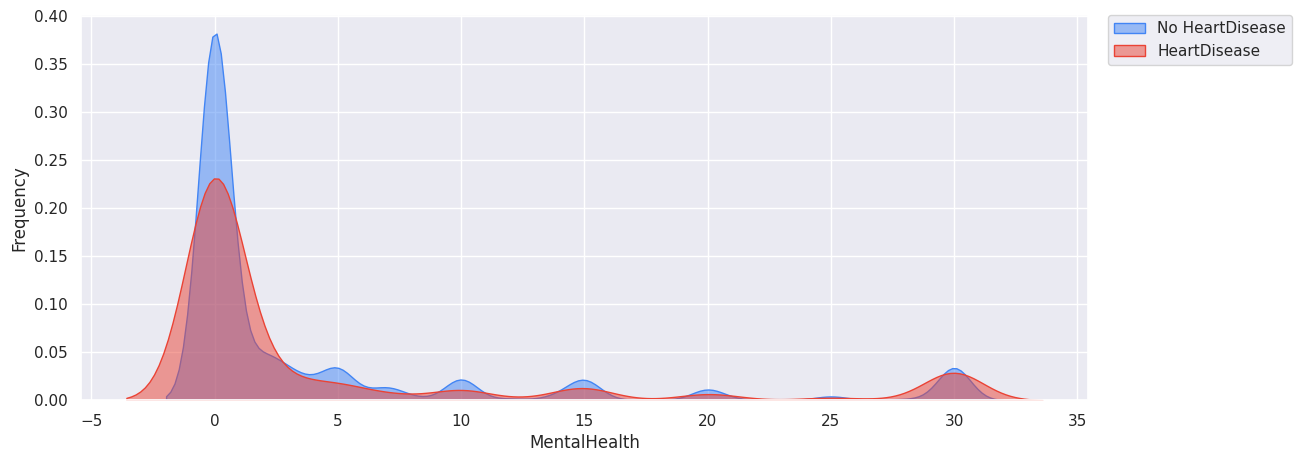

In [ ]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]=='No']["MentalHealth"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["MentalHealth"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

<ipython-input-17-e4e87c4dff48>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-17-e4e87c4dff48>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




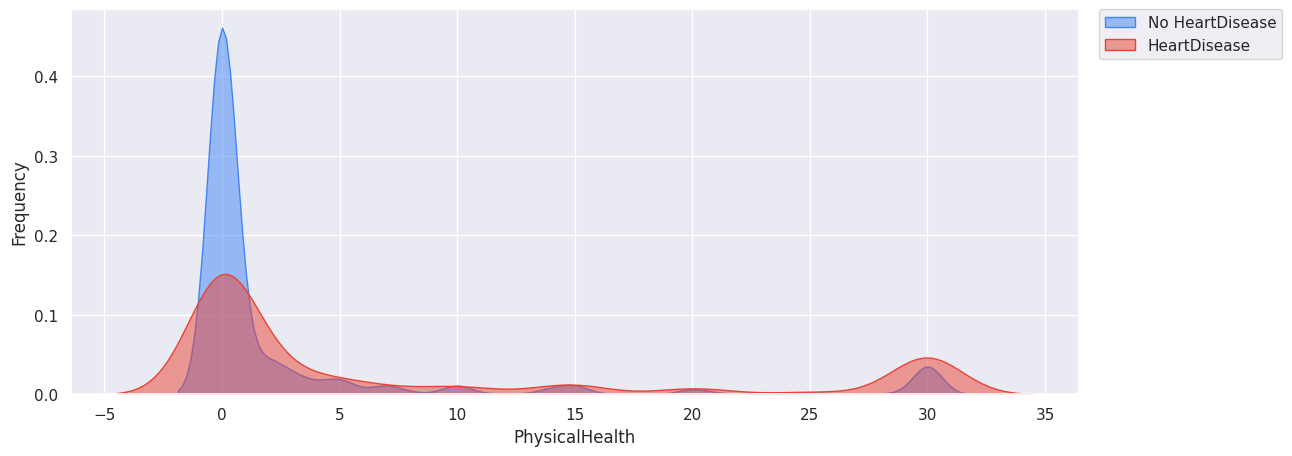

In [ ]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]=='No']["PhysicalHealth"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["PhysicalHealth"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

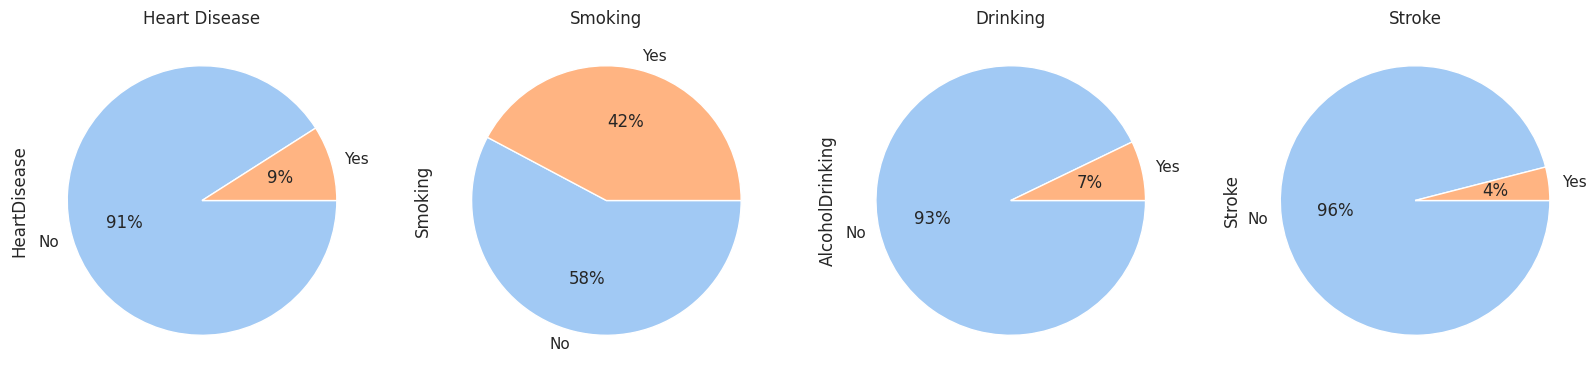

In [ ]:
plt.figure(figsize=(20,20))
colors = sns.color_palette('pastel')

plt.subplot(1, 4, 1)
df['HeartDisease'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Heart Disease')

plt.subplot(1, 4, 2)
df['Smoking'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Smoking')

plt.subplot(1, 4, 3)
df['AlcoholDrinking'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Drinking')

plt.subplot(1, 4, 4)
df['Stroke'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Stroke')

plt.show()

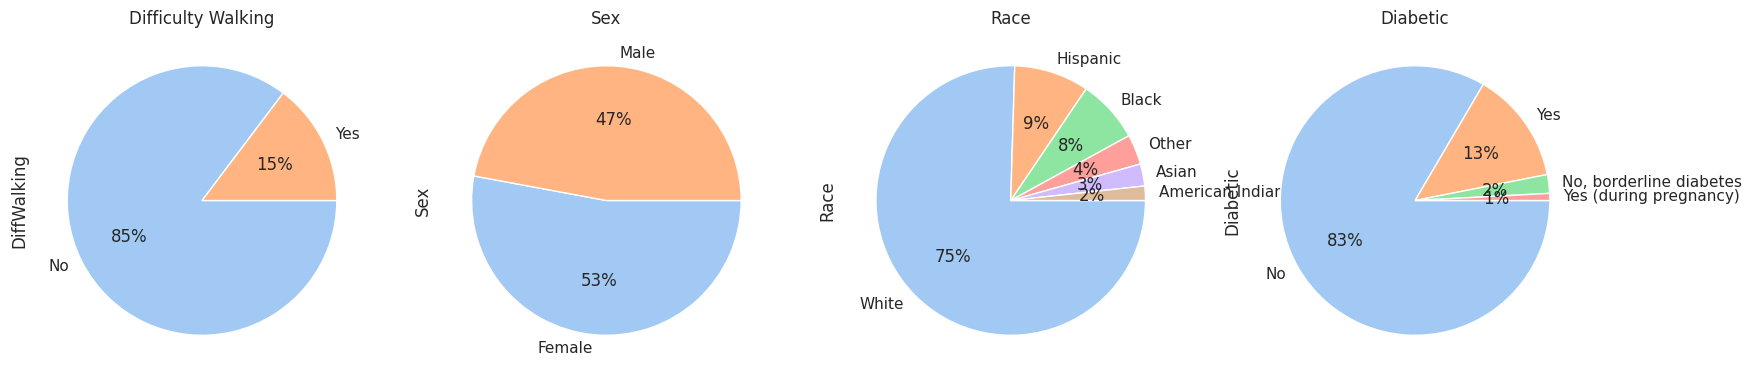

In [ ]:
plt.figure(figsize=(20,20))
colors = sns.color_palette('pastel')

plt.subplot(1, 4, 1)
df['DiffWalking'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Difficulty Walking')

plt.subplot(1, 4, 2)
df['Sex'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Sex')

plt.subplot(1, 4, 3)
df['Race'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Race')

plt.subplot(1, 4, 4)
df['Diabetic'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Diabetic')

plt.show()

Visualization of Categorical Data

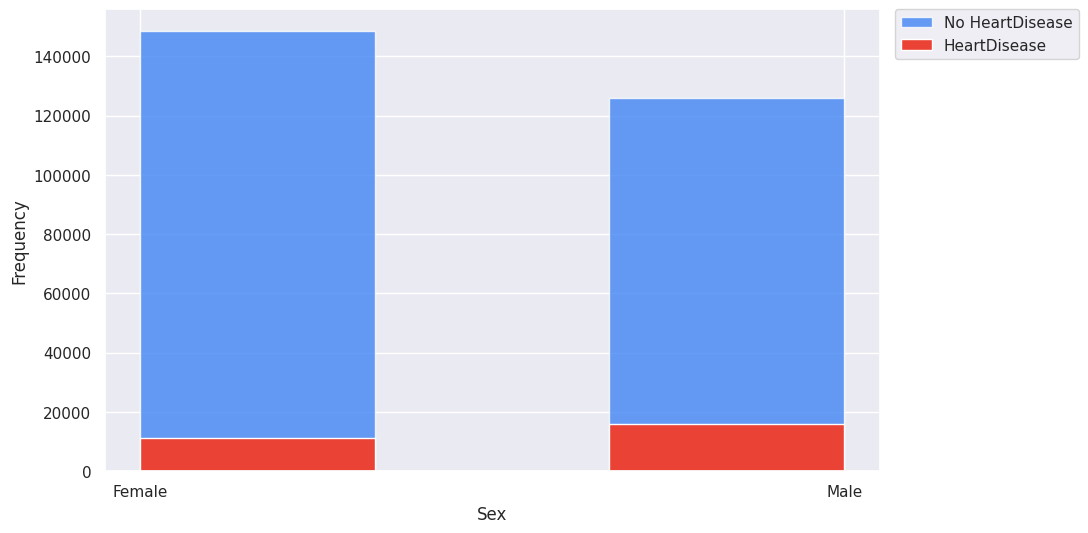

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Sex"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Sex"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [ ]:
female_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Sex']=='Female')])
num_female = len(df[df['Sex']=='Female'])
male_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Sex']=='Male')])
num_male = len(df[df['Sex']=='Male'])
print('Probability of Male to have Heart disease:', male_with_heart_disease/num_male)
print('Probability of Female to have Heart disease:', female_with_heart_disease/num_female)

Probability of Male to have Heart disease: 0.11297748616645312
Probability of Female to have Heart disease: 0.07022565149588841


Most heart disease patients are Male than Females
More Females were tested than males
Males are approximately 1.6 times more likely to have heart disease than females

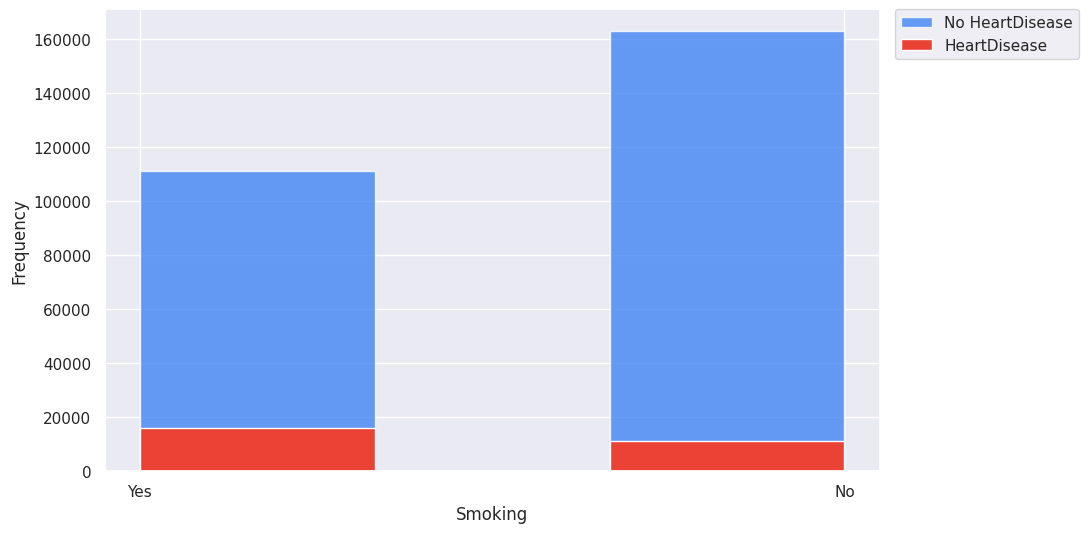

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Smoking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Smoking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [ ]:
smoke_and_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Smoking']=='Yes')])
num_smoke = len(df[df['Smoking']=='Yes'])
no_smoke_and_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Smoking']=='No')])
num_no_smoke = len(df[df['Smoking']=='No'])
print('Probability of Heart disease if you smoke:', smoke_and_heart_disease/num_smoke)
print("Probability of Heart disease if you don't smoke:", no_smoke_and_heart_disease/num_no_smoke)

Probability of Heart disease if you smoke: 0.12540324163101918
Probability of Heart disease if you don't smoke: 0.06473449905915829


Most heart disease patients smoke
People who smoke are approximately twice as likely to have heart disease than people who don't smoke

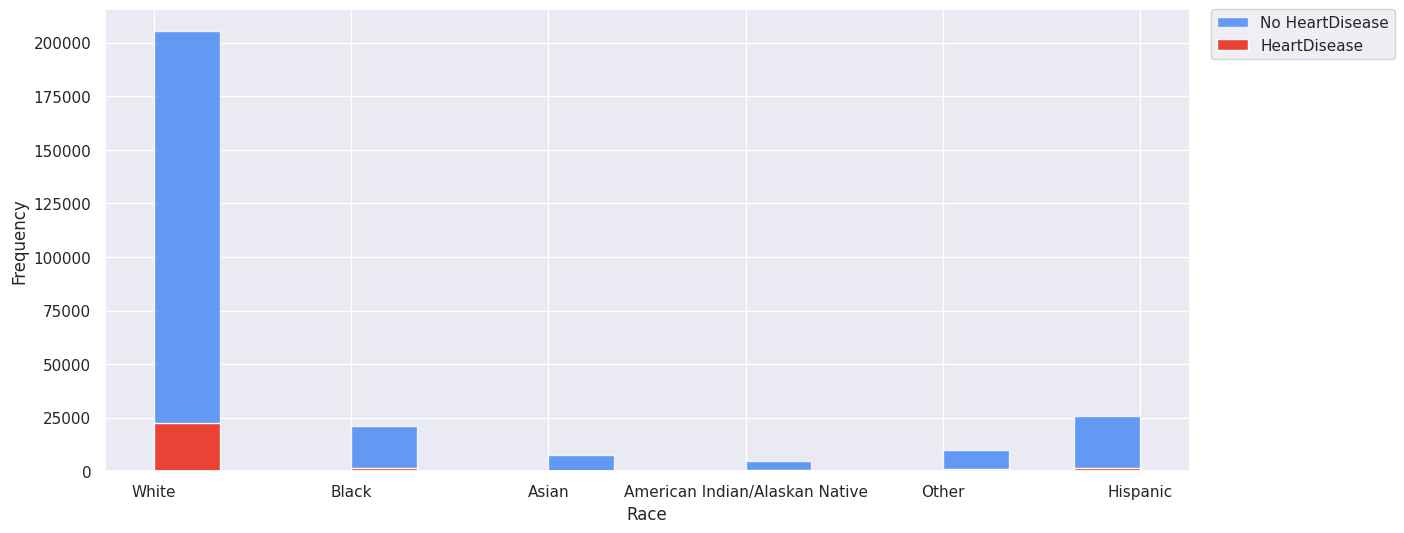

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))

ax.hist(df[df["HeartDisease"]=='No']["Race"], bins=15, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Race"], bins=15, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Most Heart Disease Patients are White people

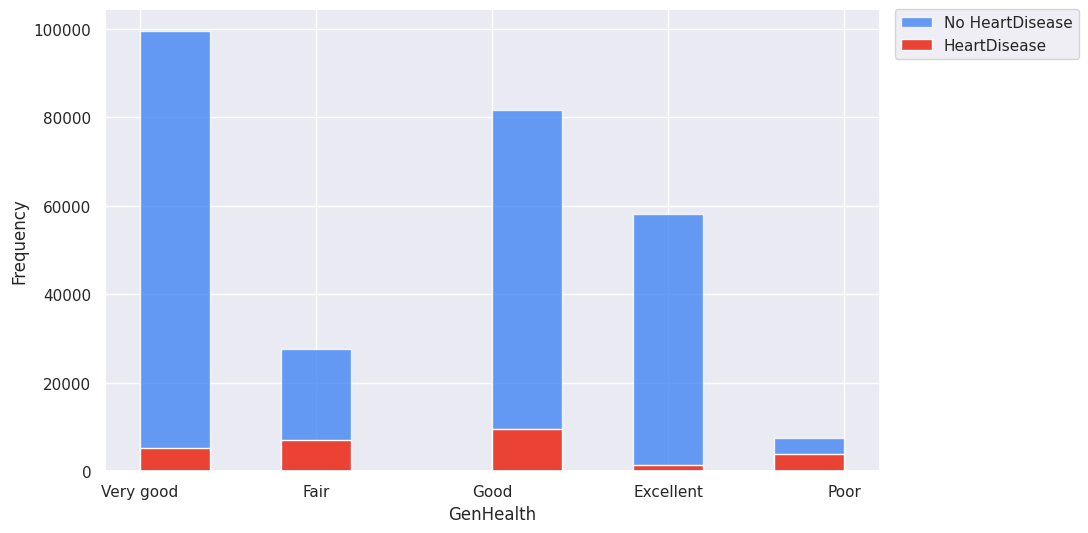

In [ ]:

fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["GenHealth"], bins=10, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["GenHealth"], bins=10, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("GenHealth")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

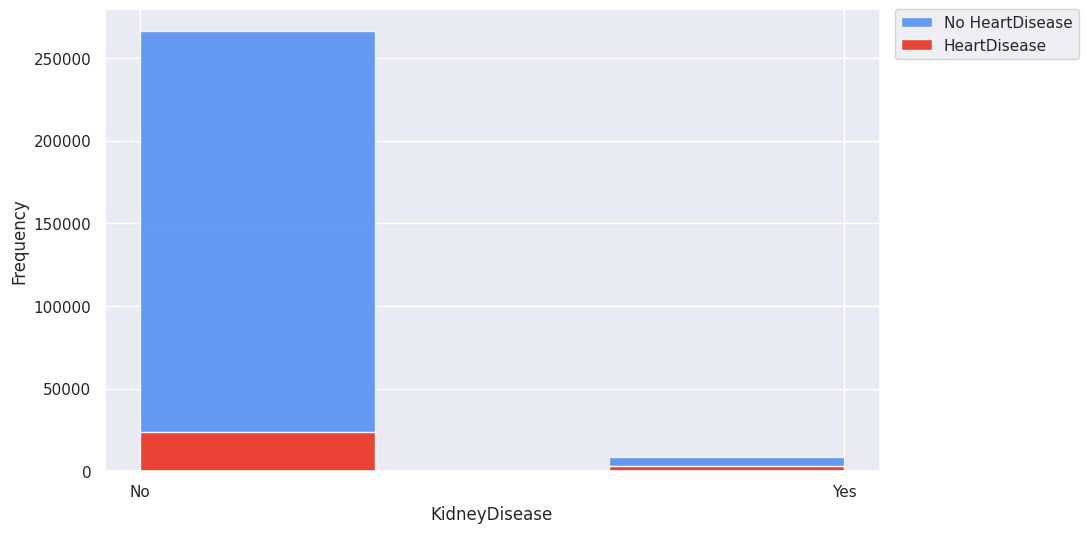

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["KidneyDisease"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["KidneyDisease"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Most of the people tested have no kidney disease

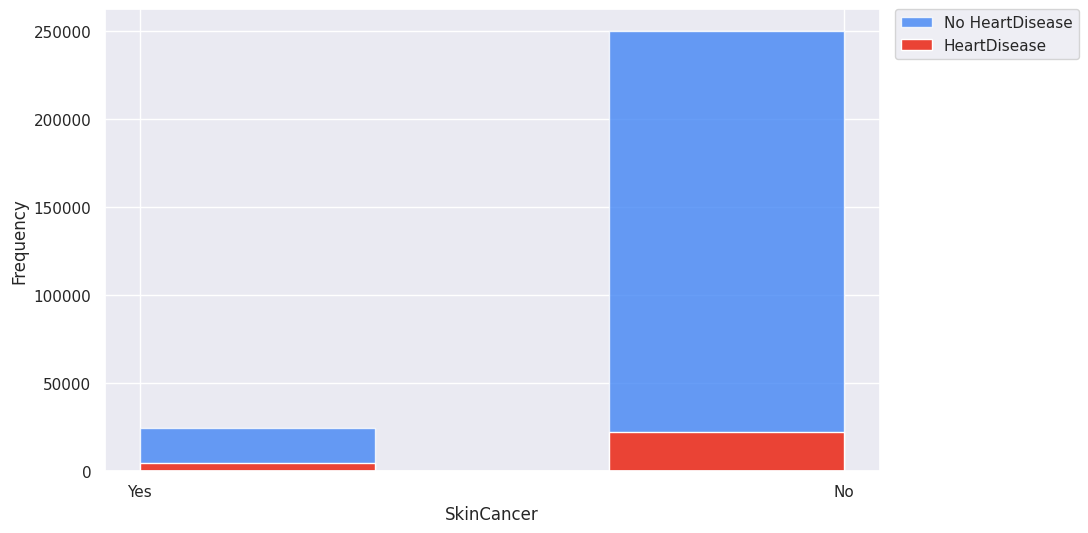

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["SkinCancer"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["SkinCancer"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("SkinCancer")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

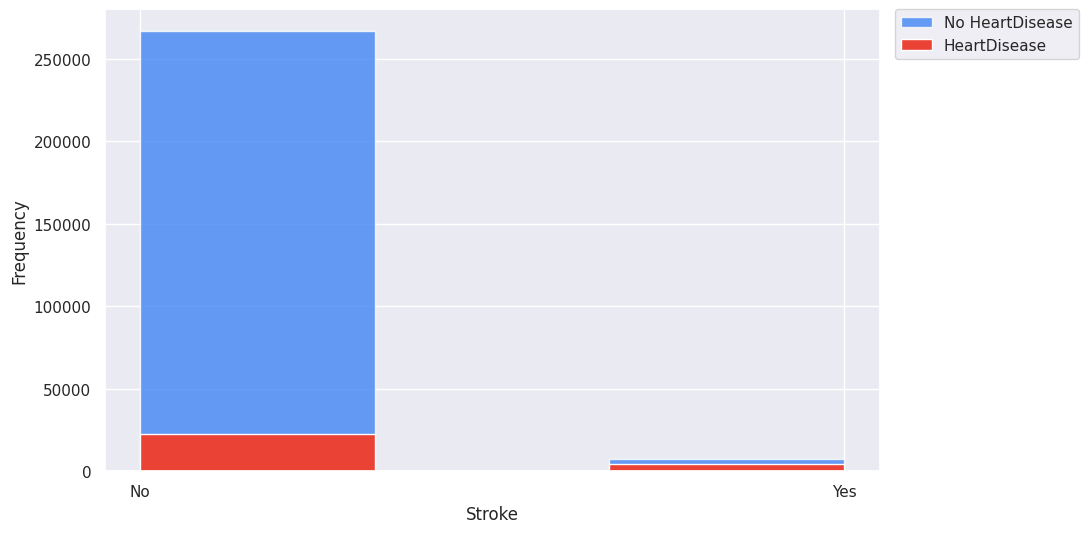

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Stroke"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Stroke"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

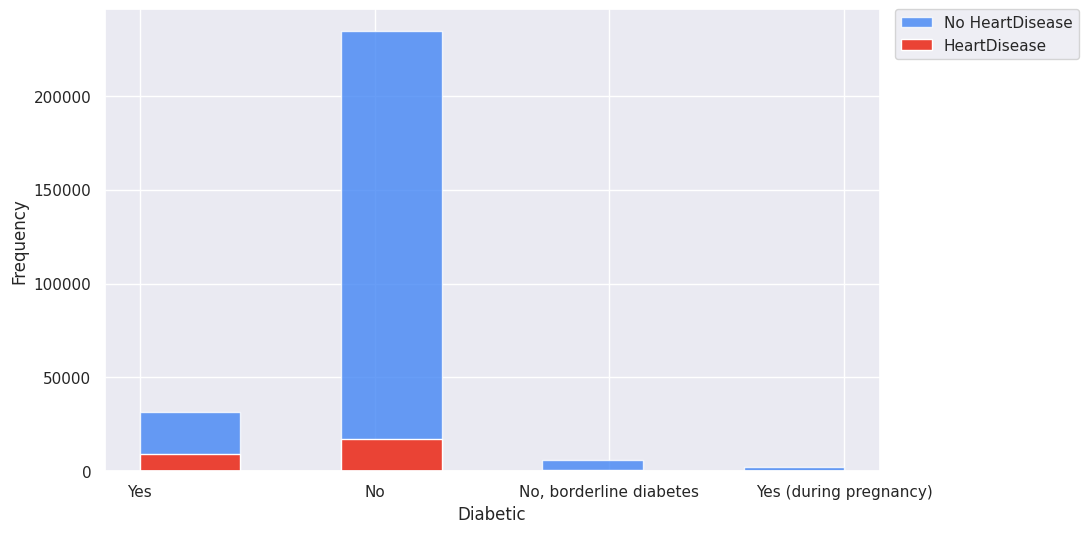

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Diabetic"], bins=7, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Diabetic"], bins=7, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

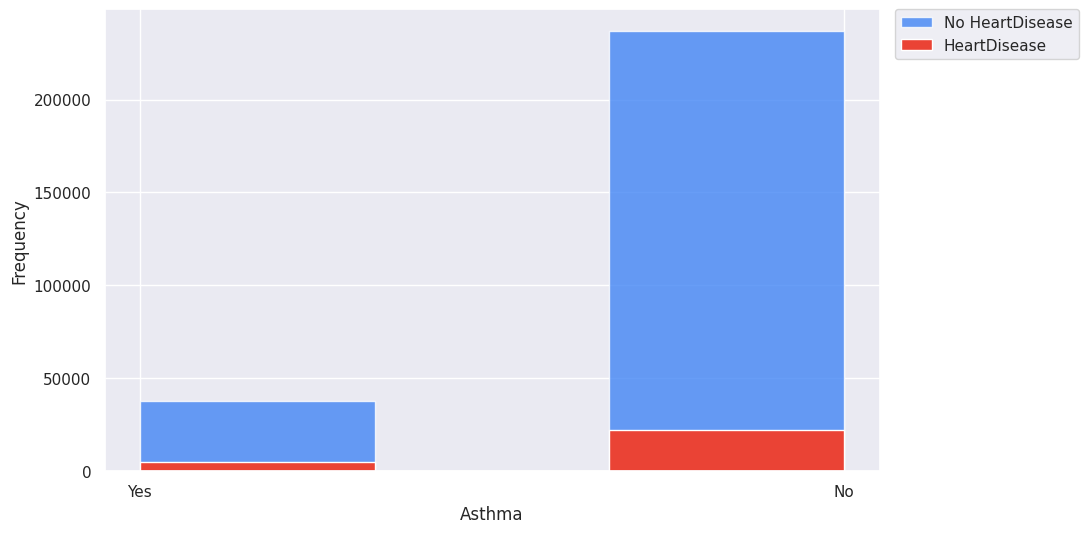

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Asthma"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Asthma"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Asthma")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

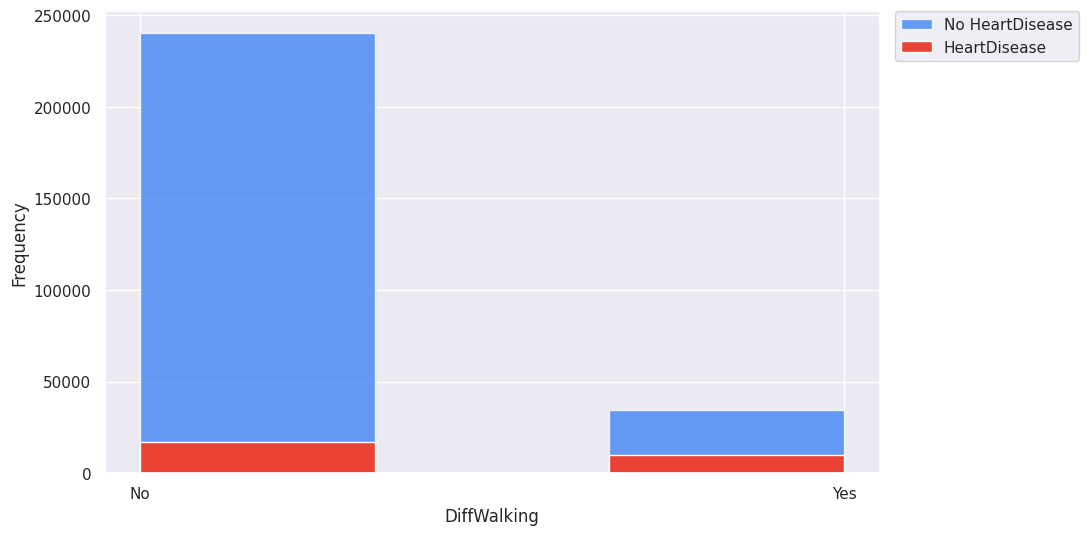

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["DiffWalking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["DiffWalking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("DiffWalking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

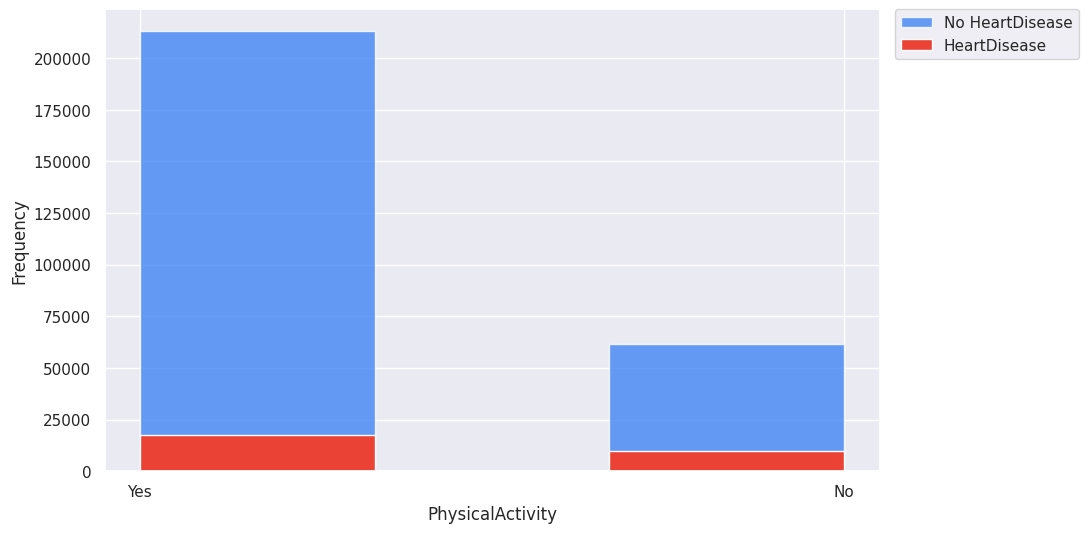

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["PhysicalActivity"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["PhysicalActivity"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("PhysicalActivity")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

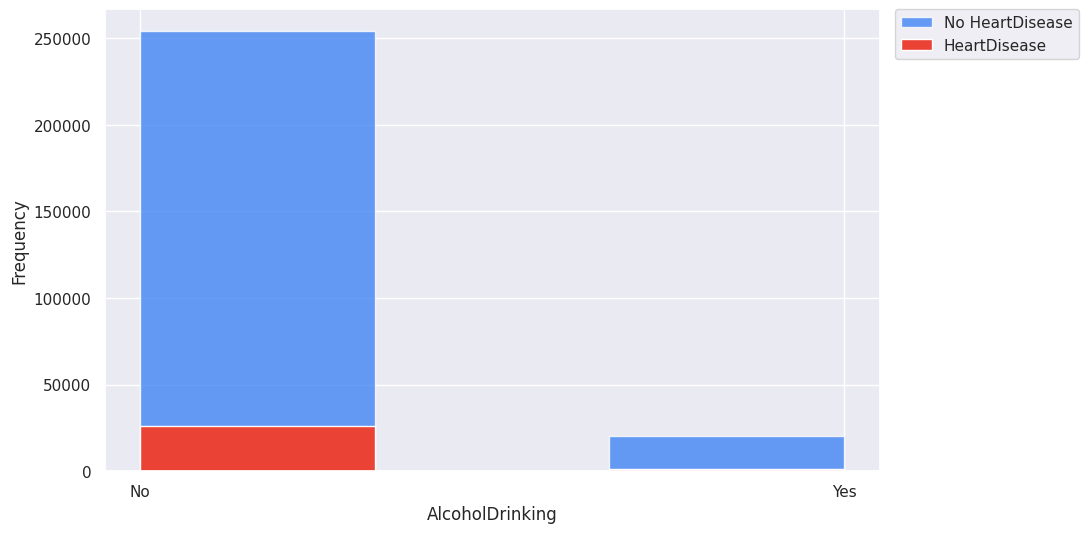

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["AlcoholDrinking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["AlcoholDrinking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("AlcoholDrinking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Data Cleaning & Preprocessing

Continuous Columns

In [ ]:
print('Continuous Columns')
df.select_dtypes(include=['float']).describe().T[['min', 'mean', 'max']].style.background_gradient(cmap='Blues')

Continuous Columns


,min,mean,max
BMI,12.020000,28.441970,94.850000
PhysicalHealth,0.000000,3.572298,30.000000
MentalHealth,0.000000,4.121475,30.000000
AgeCategory,21.000000,54.325964,80.000000
SleepTime,1.000000,7.084559,24.000000


The range of continuous features are different.
Here, I am scaling them to be in-between 0 to 1 by dividing by the maximum value of the respective column

In [ ]:
for col in ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']:
    df[col] = df[col]/df[col].max()

In [ ]:
print('\nCategorical Columns\n')
df.select_dtypes(include=['O']).nunique()


Categorical Columns



HeartDisease        2
Smoking             2
AlcoholDrinking     2
Stroke              2
DiffWalking         2
Sex                 2
Race                6
Diabetic            4
PhysicalActivity    2
GenHealth           5
Asthma              2
KidneyDisease       2
SkinCancer          2
dtype: int64

Some categorical columns have 2 values, and some have more than 2 values.
Here, I will convert the columns with 2 unique values to binary (either 1 or 0)
And one-hot encode the other categorical columns which has more than 2 unique values

In [ ]:
# Integer encode columns with 2 unique values
for col in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    if df[col].dtype == 'O':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
# One-hot encode columns with more than 2 unique values
df = pd.get_dummies(df, columns=['Race', 'Diabetic', 'GenHealth', ], prefix = ['Race', 'Diabetic', 'GenHealth'])

In [ ]:
fig = px.imshow(df[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                    'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','BMI', 'PhysicalHealth',
                    'MentalHealth', 'AgeCategory', 'SleepTime']].corr(),color_continuous_scale="Blues")
fig.update_layout(height=800)
fig.show()

In [ ]:
features = df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good']]

labels = df['HeartDisease']

Splitting the dataset- 20% for validation, and the rest 80% for training

In [ ]:
train_df = df[:int(len(df)*0.8)]
val_df = df[int(len(df)*0.8):]

In [ ]:
print('\nData in Train:')
print(train_df['HeartDisease'].value_counts())

print('\nData in Val:')
print(val_df['HeartDisease'].value_counts())


Data in Train:
0    219619
1     21754
Name: HeartDisease, dtype: int64

Data in Val:
0    54837
1     5507
Name: HeartDisease, dtype: int64


The dataset is not balanced, there is way more number of samples for people who have no Heart Disease than people with Heart Disease.
This can be fixed by oversampling the data

In [ ]:
class_0 = train_df[train_df['HeartDisease'] == 0]
class_1 = train_df[train_df['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
train_df = pd.concat([class_0, class_1], axis=0)
print('Data in Train:')
print(train_df['HeartDisease'].value_counts())

Data in Train:
0    219619
1    219619
Name: HeartDisease, dtype: int64


In [ ]:
class_0 = val_df[val_df['HeartDisease'] == 0]
class_1 = val_df[val_df['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
val_df = pd.concat([class_0, class_1], axis=0)
print('Data in Test:')
print(val_df['HeartDisease'].value_counts())

Data in Test:
0    54837
1    54837
Name: HeartDisease, dtype: int64


Now the dataset is balanced

Here, I am creating arrays: x_train, y_train, x_val, y_val to train and evaluate the model

In [ ]:
x_train = np.array(train_df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good']])
y_train = np.array(train_df['HeartDisease'])

x_val = np.array(val_df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good']])
y_val = np.array(val_df['HeartDisease'])

Model

In [ ]:
rf = RandomForestClassifier().fit(x_train, y_train)

y_pred = rf.predict(x_val)

print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.95      0.70     54837
           1       0.82      0.22      0.34     54837

    accuracy                           0.59    109674
   macro avg       0.69      0.59      0.52    109674
weighted avg       0.69      0.59      0.52    109674



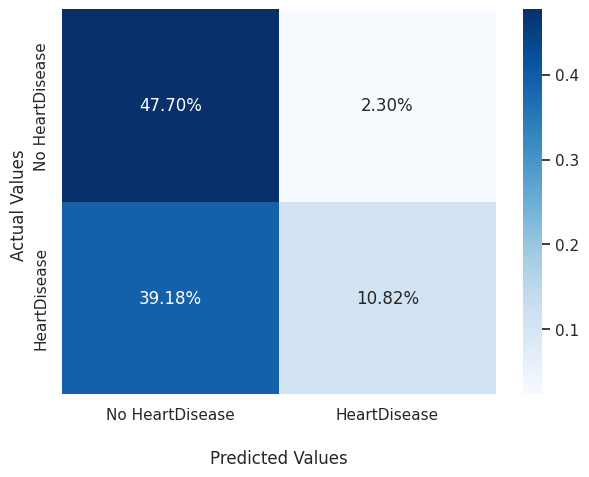

In [ ]:
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

In [ ]:
df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
HeartDisease,1.000000,0.047260,0.104524,-0.036289,0.194665,0.165235,0.020913,0.196420,0.074435,0.237493,...,0.048892,-0.165966,0.013793,0.178917,-0.015508,-0.113218,0.143265,0.031748,0.172437,-0.100540
BMI,0.047260,1.000000,0.015890,-0.043463,0.016314,0.103813,0.056724,0.177388,0.024200,-0.001693,...,-0.041448,-0.203952,0.047106,0.199859,0.006676,-0.172330,0.122887,0.110611,0.059747,-0.068584
Smoking,0.104524,0.015890,1.000000,0.109183,0.058868,0.110270,0.078364,0.115789,0.087514,0.130641,...,0.083659,-0.048180,0.004426,0.052500,-0.007271,-0.107082,0.091346,0.050007,0.084953,-0.053652
AlcoholDrinking,-0.036289,-0.043463,0.109183,1.000000,-0.022707,-0.023255,0.045421,-0.041135,0.006824,-0.059759,...,0.040372,0.063882,-0.010214,-0.063708,-0.005308,0.022824,-0.023800,-0.013807,-0.019809,0.018050
Stroke,0.194665,0.016314,0.058868,-0.022707,1.000000,0.132966,0.041324,0.170664,-0.001343,0.140505,...,0.006864,-0.098923,0.009484,0.105108,-0.005574,-0.072065,0.101445,0.008392,0.131741,-0.068225
PhysicalHealth,0.165235,0.103813,0.110270,-0.023255,0.132966,1.000000,0.279657,0.422935,-0.038427,0.115006,...,0.008125,-0.145269,0.017889,0.151242,-0.003011,-0.170597,0.297801,-0.049225,0.470076,-0.196522
MentalHealth,0.020913,0.056724,0.078364,0.045421,0.041324,0.279657,1.000000,0.142964,-0.098916,-0.158328,...,-0.011455,-0.021528,0.007045,0.015977,0.016415,-0.104461,0.143266,0.001844,0.188198,-0.085304
DiffWalking,0.196420,0.177388,0.115789,-0.041135,0.170664,0.422935,0.142964,1.000000,-0.067335,0.248600,...,-0.004359,-0.202817,0.028607,0.210911,-0.009166,-0.171623,0.276789,0.021949,0.306152,-0.184921
Sex,0.074435,0.024200,0.087514,0.006824,-0.001343,-0.038427,-0.098916,-0.067335,1.000000,-0.060206,...,0.013556,0.000275,-0.003006,0.024423,-0.087183,0.020717,-0.020016,0.006179,-0.009216,-0.006222
AgeCategory,0.237493,-0.001693,0.130641,-0.059759,0.140505,0.115006,-0.158328,0.248600,-0.060206,1.000000,...,0.196368,-0.211759,0.050269,0.218023,-0.034408,-0.142595,0.105056,0.058912,0.088471,-0.043104


In [ ]:
px.box(df,x="HeartDisease",y="AgeCategory")
# older patients has a more change To have a HeartDisease

<Axes: xlabel='HeartDisease', ylabel='PhysicalHealth'>

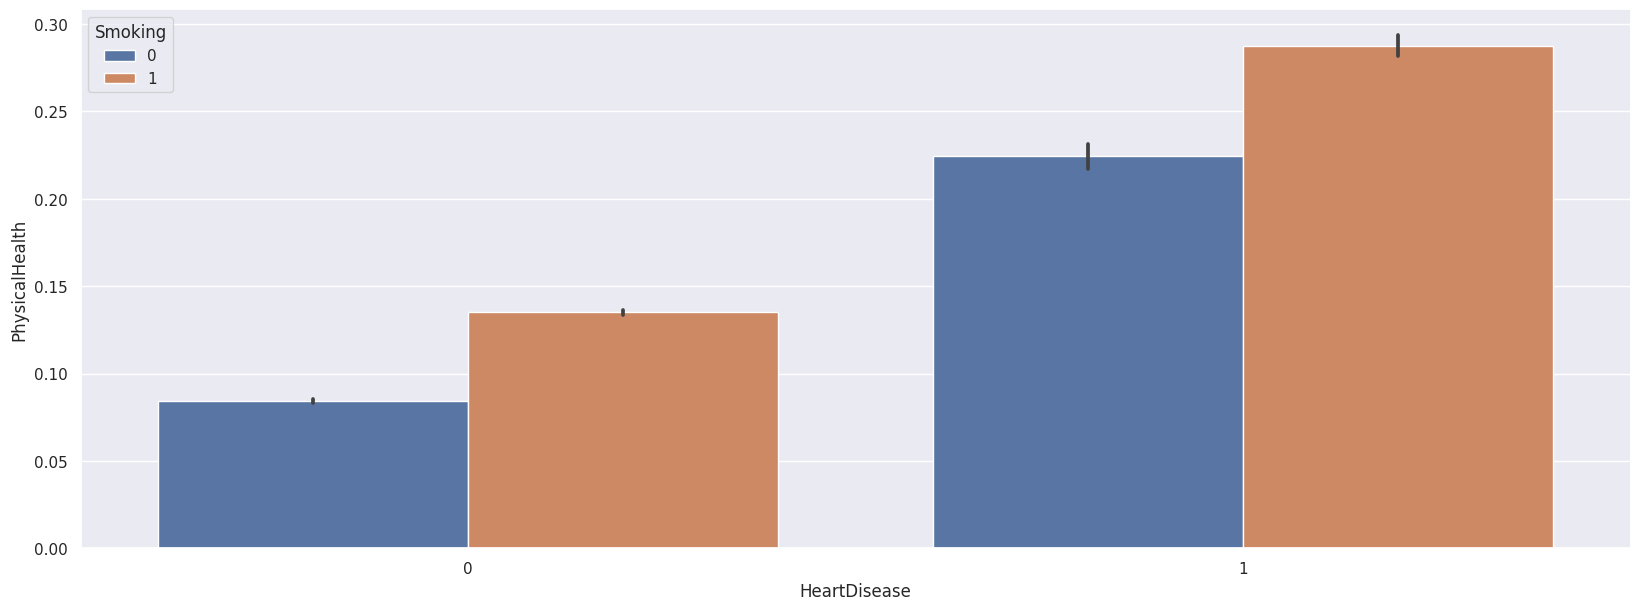

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(data=df,x="HeartDisease",y="PhysicalHealth",hue="Smoking")
# Most of patients with HeartDisease had A bad PhysicalHealth

LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split
X = df_2.drop("HeartDisease",axis=1)
y = df_2["HeartDisease"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     82383
           1       0.50      0.09      0.15      8133

    accuracy                           0.91     90516
   macro avg       0.71      0.54      0.55     90516
weighted avg       0.88      0.91      0.88     90516



In [ ]:
X = df_2.drop("HeartDisease",axis=1)
y = df_2["HeartDisease"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     82383
           1       0.32      0.11      0.16      8133

    accuracy                           0.90     90516
   macro avg       0.62      0.54      0.55     90516
weighted avg       0.86      0.90      0.88     90516

